                                                review  cluster
0    privacy at least put some option appear offlin...        0
1    messenger issues ever since the last update, i...        2
2    profile any time my wife or anybody has more t...        0
3    the new features suck for those of us who don'...        0
4    forced reload on uploading pic on replying com...        0
..                                                 ...      ...
886  loved it i loooooooooooooovvved it because it ...        0
887  all time legendary game the birthday party lev...        0
888  ads are way to heavy listen to the bad reviews...        0
889  fun works perfectly well. ads aren't as annoyi...        0
890  they're everywhere i see angry birds everywher...        0

[891 rows x 2 columns]


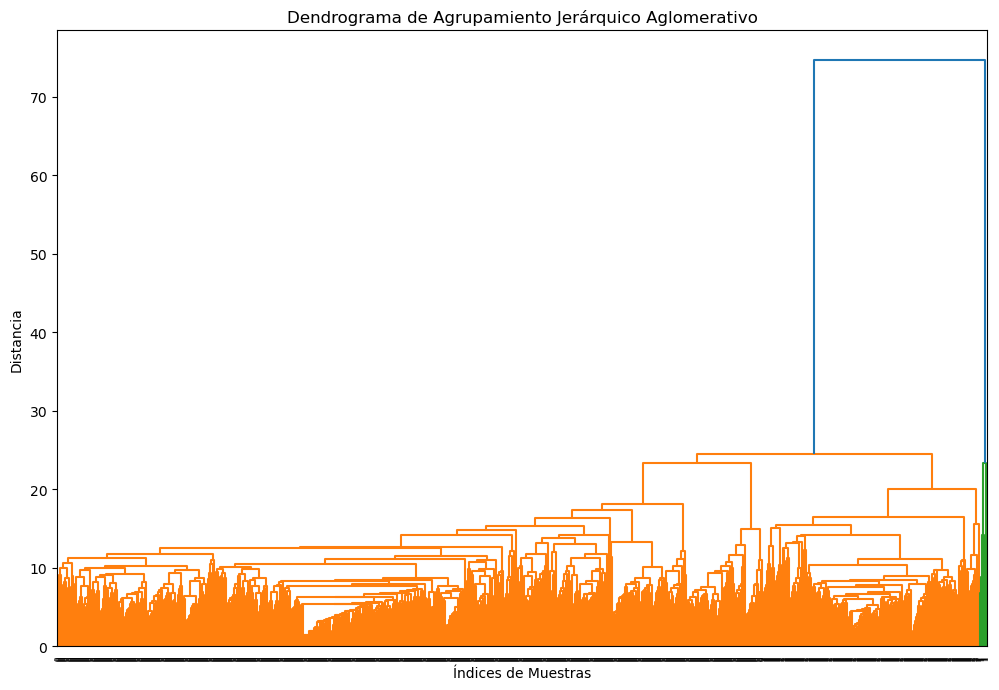

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Leer el archivo CSV y crear el DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

# Eliminar la columna "package_name"
df = df.drop("package_name", axis=1)

# Convertir la columna "review" a minúsculas
df["review"] = df["review"].str.strip().str.lower()

# Crear el vectorizador de texto con "english" como palabras a ignorar (stop words)
vec_model = CountVectorizer(stop_words="english")

# Vectorizar las características de texto
X_vectorized = vec_model.fit_transform(df["review"]).toarray()

# Aplicar el algoritmo de agrupamiento jerárquico aglomerativo
n_clusters = 3  # Número de clusters deseados
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering_model.fit_predict(X_vectorized)

# Agregar los resultados del clustering al DataFrame
df["cluster"] = clusters

# Imprimir los resultados
print(df[["review", "cluster"]])

# Crear un dendrograma para visualizar los clusters jerárquicos
linkage_matrix = linkage(X_vectorized, method='ward')  # Método de enlace: Ward
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df["cluster"].values, distance_sort='descending', show_leaf_counts=True)
plt.xlabel("Índices de Muestras")
plt.ylabel("Distancia")
plt.title("Dendrograma de Agrupamiento Jerárquico Aglomerativo")
plt.show()